##### 영화 선정 기준
- 2008~2019년 영화
- 관객수 200명 이상
- 스크린수 20개 이상
###### 결측치 
- 배급사 정보가 없는 영화 '더게임'을 Top1 배급사인 

##### 스케일링
관객수, 매출

In [2]:
df = pd.read_csv('./final_movie_Rev3.csv',thousands=',')
df.drop(index=0, axis=0, inplace=True)
df.rename(columns={'영화명':'Movie', '배급사':'Distributor', '개봉일':'Release_Date', 
           '전국':'Screen', '전국.1':'Sales', '전국.2':'Audience', '장르':'Genre', '등급':'AgeRate'}, inplace=True)

In [3]:
# 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 1 to 811
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie         811 non-null    object
 1   Distributor   811 non-null    object
 2   Release_Date  811 non-null    object
 3   Screen        811 non-null    object
 4   Sales         811 non-null    object
 5   Audience      811 non-null    object
 6   Genre         811 non-null    object
 7   AgeRate       811 non-null    object
dtypes: object(8)
memory usage: 57.0+ KB


In [4]:
df['Audience'] = df['Audience'].str.replace(',','')
df['Screen'] = df['Screen'].str.replace(',','')
df['Sales'] = df['Sales'].str.replace(',','')
df['Audience'] = df['Audience'].astype('int')
df['Screen'] = df['Screen'].astype('int')
df['Sales'] = df['Sales'].astype('int64')

In [5]:
df['Year'] = pd.DatetimeIndex(df['Release_Date']).year
df['Month'] = pd.DatetimeIndex(df['Release_Date']).month
df.drop(columns=['Release_Date'], inplace=True)
df['Season'] = [(month%12 + 3)//3 for month in df['Month']]

In [6]:
# 관객수,매출은 모두 unit: 1,000,000 이다.
df['Audience'] = df['Audience']/1000000
df['Sales'] = df['Sales']/1000000
df.reset_index(drop=True,inplace=True)

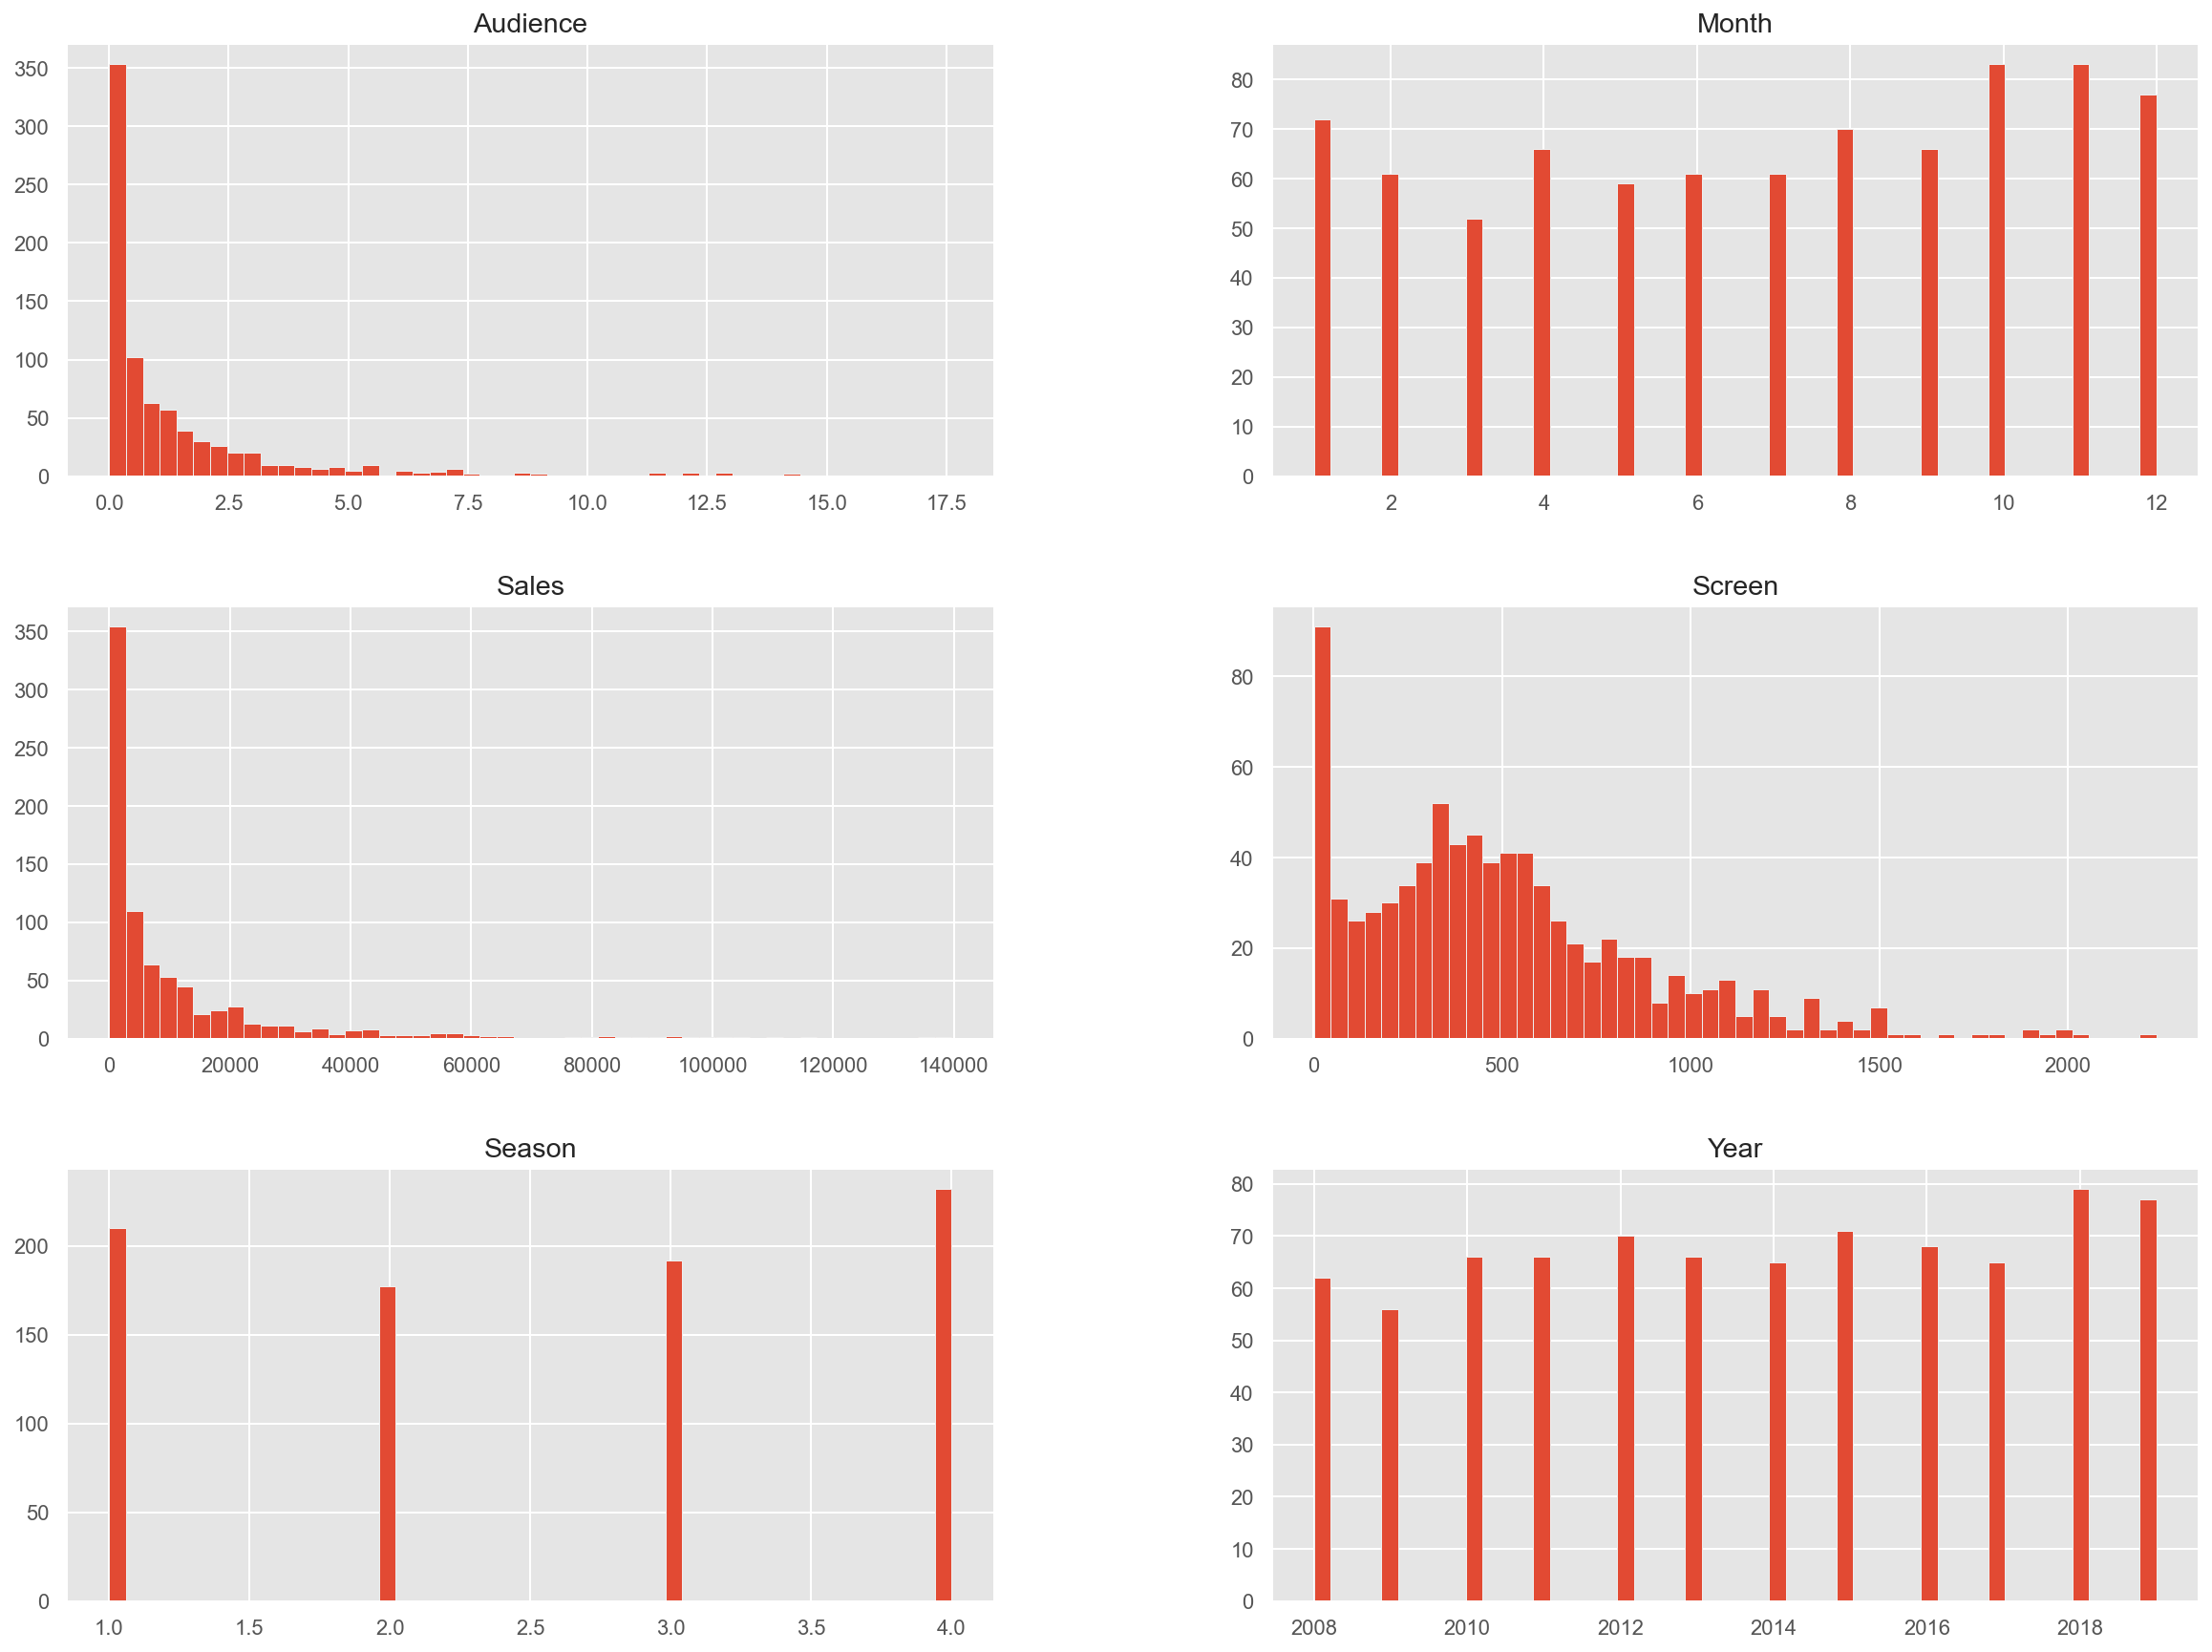

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

df.hist(bins=50, figsize=(20,15))
plt.show()
# 특정배급사가 많은 영화를 배급하고 있으며, 스크린수를 많이 가져가는 영화도 지극히 작다.
# 장르별 영화 개봉수도 특정 장르에 편중되있다.

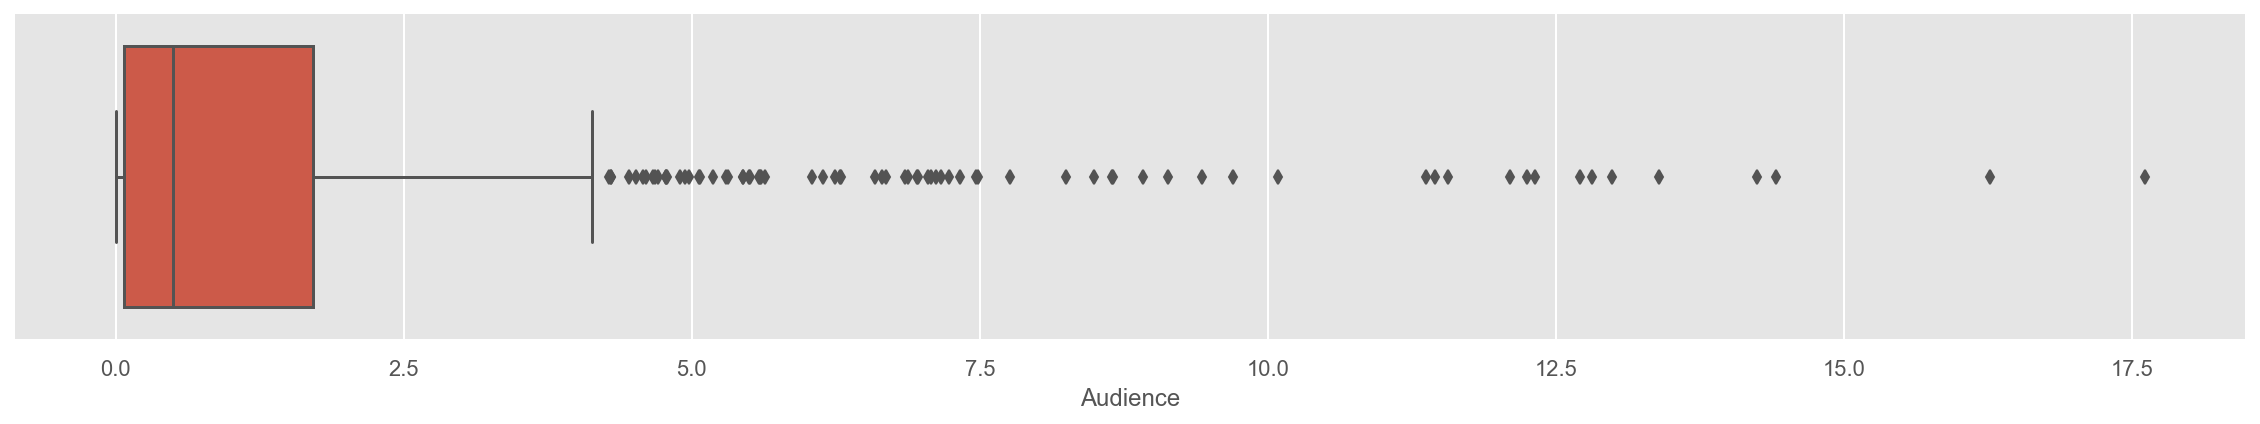

In [10]:
plt.style.use(['ggplot'])
plt.figure(figsize=(20,3)) 
sns.boxplot(x=df["Audience"])
plt.show()

In [19]:
# 인코딩
genre = df[['Genre']]
agerate = df[['AgeRate']]
distributor = df[['Distributor']]

from sklearn.preprocessing import OrdinalEncoder
oridinal_encoder = OrdinalEncoder()
genre_1 = oridinal_encoder.fit_transform(genre)
agerate_1 = oridinal_encoder.fit_transform(agerate)
distributor_1 = oridinal_encoder.fit_transform(distributor)
genre_1 = pd.DataFrame(genre_1, columns=['genre_1'])
agerate_1 = pd.DataFrame(agerate_1, columns=['agerate_1'])
distributor_1 = pd.DataFrame(distributor_1, columns=['distributor_1'])

In [20]:
df = pd.concat([df, genre_1, agerate_1, distributor_1], axis=1)
df[:4]

,Movie,Distributor,Screen,Sales,Audience,Genre,AgeRate,Year,Month,Season,genre_1,agerate_1,distributor_1
0,명량,씨제이이앤엠(주),1587,135748.398910,17.613682,사극,15세이상관람가,2014,7,3,11.0,1.0,136.0
1,극한직업,씨제이이앤엠(주),1978,139647.979516,16.264944,코미디,15세이상관람가,2019,1,1,18.0,1.0,136.0
2,신과함께-죄와 벌,롯데쇼핑㈜롯데엔터테인먼트,1912,115698.654137,14.410754,판타지,12세이상관람가,2017,12,1,19.0,0.0,108.0
3,국제시장,씨제이이앤엠(주),966,110828.014630,14.245998,드라마,12세이상관람가,2014,12,1,6.0,0.0,136.0


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(['ggplot'])
df.hist(bins=50, figsize=(20,15))
plt.show()

NameError: name 'df' is not defined

In [11]:
# Feature: 장르,등급,개봉년/개봉월/계절, 스크린수, 배급사 - No.7
# Label : 관객수

In [46]:
df = df[['genre_1', 'agerate_1', 'Year', 'Month', 'Season', 'Screen', 'distributor_1', 'Audience']]

In [ ]:
sns.pairplot(df)

In [ ]:
# 상관계수
# 이 모델링 쉽지 않을것 같다.
corr_matrix = df.corr()
corr_matrix['Audience'].sort_values(ascending=False)

In [ ]:
df

RMSE of Train Data :  1.5694483127143204
RMSE of Test Data :  1.7353502116885888


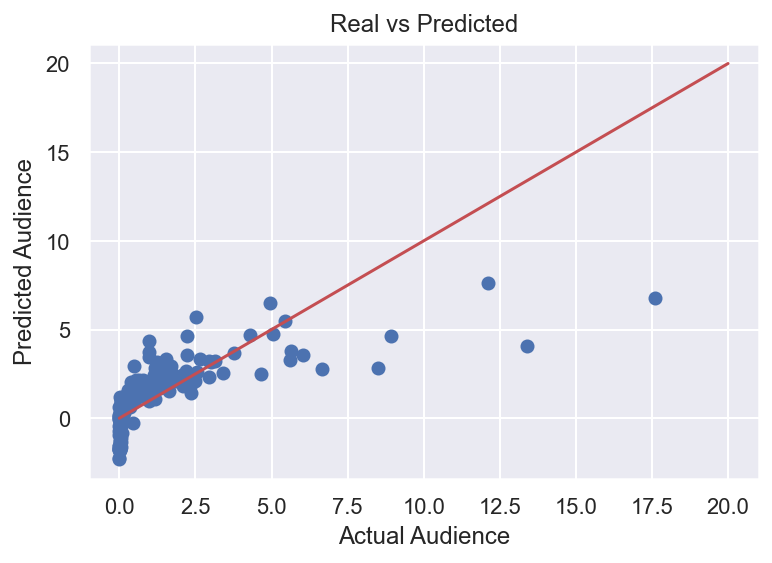

In [47]:
from sklearn.model_selection import train_test_split

X= df.drop(['Audience'], axis=1)
y = df['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 인코딩

In [48]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[2.43461483]


In [49]:
243/300

0.81

In [50]:
7*0.81

5.67

In [51]:
df_2 = pd.read_csv('./final_movie_Rev3.csv',thousands=',')
df_2.drop(index=0, axis=0, inplace=True)
df_2.rename(columns={'영화명':'Movie', '배급사':'Distributor', '개봉일':'Release_Date', 
           '전국':'Screen', '전국.1':'Sales', '전국.2':'Audience', '장르':'Genre', '등급':'AgeRate'}, inplace=True)

In [52]:
df_2['Audience'] = df_2['Audience'].str.replace(',','')
df_2['Screen'] = df_2['Screen'].str.replace(',','')
df_2['Sales'] = df_2['Sales'].str.replace(',','')
df_2['Audience'] = df_2['Audience'].astype('int')
df_2['Screen'] = df_2['Screen'].astype('int')
df_2['Sales'] = df_2['Sales'].astype('int64')

In [53]:
# 관객수,매출은 모두 unit: 1,000,000 이다.
df_2['Audience'] = df_2['Audience']/1000000
df_2['Sales'] = df_2['Sales']/1000000
df_2.reset_index(drop=True,inplace=True)

In [54]:
df_2.drop(['Sales','Movie','Distributor'],axis=1, inplace=True)

In [55]:
df_2['Year'] = pd.DatetimeIndex(df_2['Release_Date']).year
df_2['Month'] = pd.DatetimeIndex(df_2['Release_Date']).month
df_2.drop(columns=['Release_Date'], inplace=True)
df_2['Season'] = [(month%12 + 3)//3 for month in df_2['Month']]

In [56]:
# AgeRate, Genre, Season, Year, Month가 0,1,2,..로 순차적으로 늘어나는 Numeric Data가 된다면,
# 그 0과 1사이, 1과2사이, 2와3사이,... 의 어떠한 관계가 있는지 보아야 하는데 그 관계가 없다.
# 원핫인코딩로 변환하자.
df_2 = pd.concat([df_2, pd.get_dummies(df_2['AgeRate'], prefix='rate')], axis=1)
df_2.drop(['AgeRate'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Genre'], prefix='genre')], axis=1)
df_2.drop(['Genre'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Season'], prefix='season')], axis=1)
df_2.drop(['Season'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Year'], prefix='year')], axis=1)
df_2.drop(['Year'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Month'], prefix='month')], axis=1)
df_2.drop(['Month'], axis=1, inplace=True)

In [57]:
# Sales는 범죄,사극이 상관계수가 높았다. 
corr_matrix = df_2.corr()
corr_matrix['Audience'].sort_values(ascending=False)

Audience          1.000000
Screen            0.673182
genre_사극          0.159465
genre_액션          0.154869
month_7           0.149556
genre_판타지         0.127850
genre_어드벤처        0.127260
season_3          0.124061
rate_15세이상관람가     0.113414
month_8           0.090482
genre_범죄          0.089934
rate_12세이상관람가     0.084539
genre_서부극(웨스턴)    0.078287
month_12          0.076271
year_2013         0.066636
season_1          0.057241
genre_SF          0.035524
year_2017         0.034500
year_2012         0.028917
month_9           0.028118
month_1           0.028088
genre_전쟁          0.025019
year_2016         0.022550
year_2014         0.020269
year_2015         0.007719
genre_코미디         0.002270
year_2019         0.002028
genre_드라마        -0.011298
month_5          -0.011351
month_2          -0.019991
rate_18세관람가      -0.021306
genre_기타         -0.023297
year_2009        -0.025667
year_2018        -0.026853
genre_미스터리       -0.032291
year_2011        -0.033203
genre_스릴러        -0.035442
g

RMSE of Train Data :  1.4681282454752123
RMSE of Test Data :  1.6516843051876262


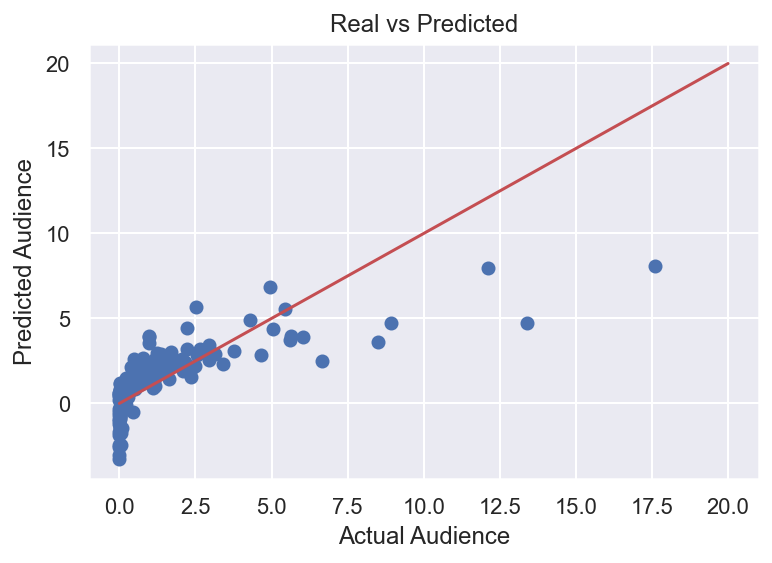

In [58]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 원핫인코딩

In [59]:
np.array(X_train.loc[109])

array([469,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1], dtype=int32)

In [61]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[2.49074129]


In [62]:
249/300

0.83

In [63]:
7*0.83

5.81

In [64]:
# 아웃라이어 제거하기 1차
df_2.drop(index=[0,1],axis=1, inplace=True)

RMSE of Train Data :  1.4088800487263762
RMSE of Test Data :  1.5437479673986774


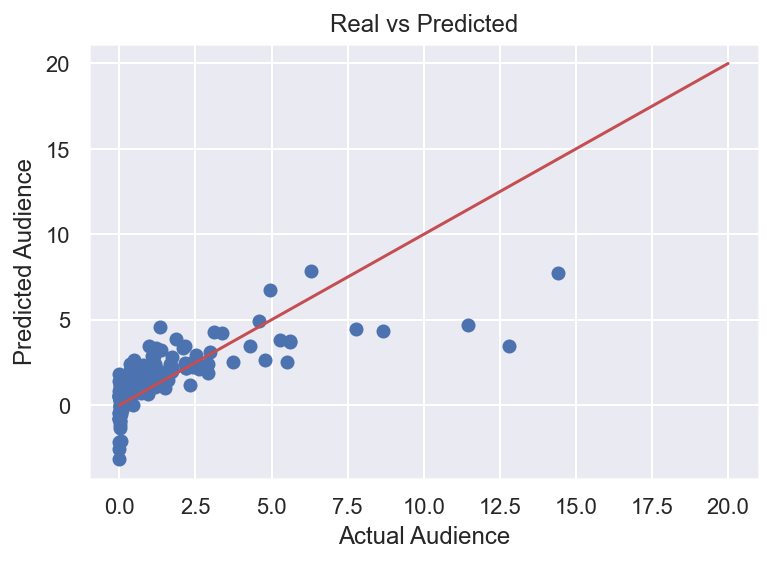

In [65]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 아웃라이어 제거하기 1차

In [66]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[2.50085341]


In [67]:
# 아웃라이어 제거하기 2차
df_2.drop(index=[2,3],axis=1,inplace=True)

RMSE of Train Data :  1.2993943177951153
RMSE of Test Data :  1.6459911510252379


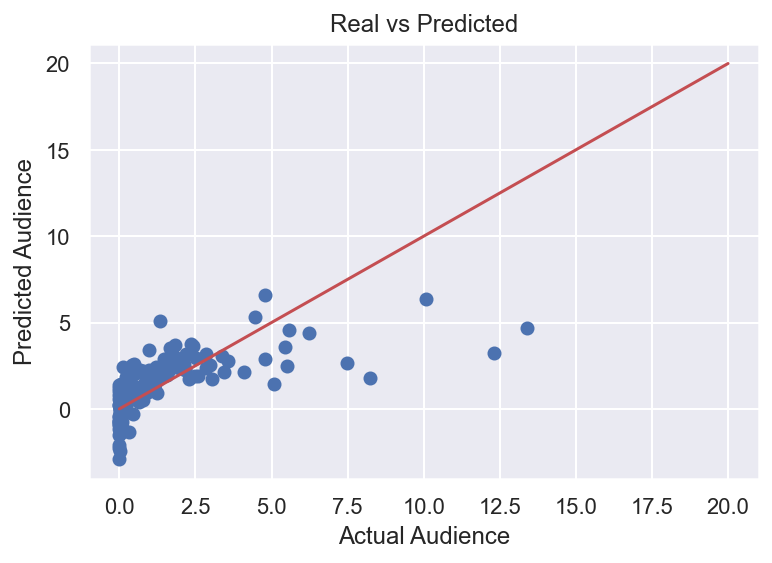

In [68]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 아웃라이어 제거하기 2차

In [69]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[2.16545134]


In [70]:
# 아웃라이어 제거 3차
fraud = df_2['Audience']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
            72, 73, 74, 75],
           dtype='int64')

In [71]:
df_2.drop(index=outlier_index,axis=1, inplace=True)

RMSE of Train Data :  0.5896944325582384
RMSE of Test Data :  0.680925554099357


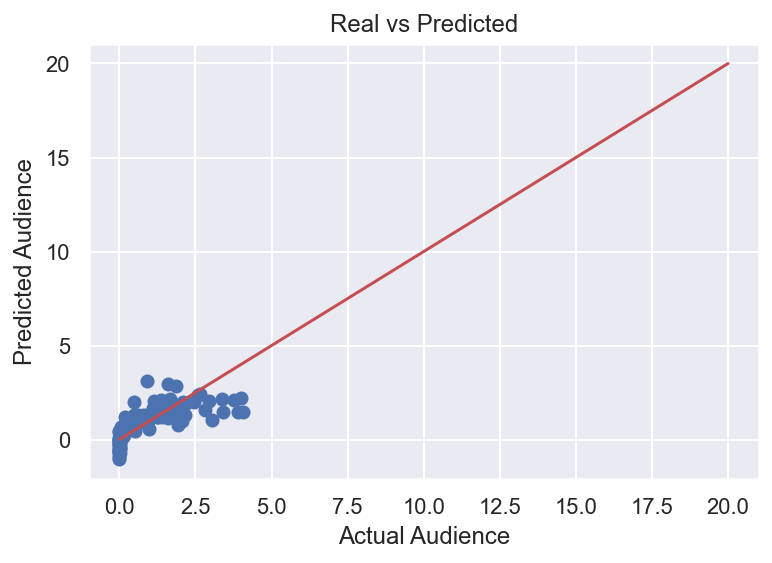

In [72]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 아웃라이어 제거 3차

In [73]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[1.3966481]


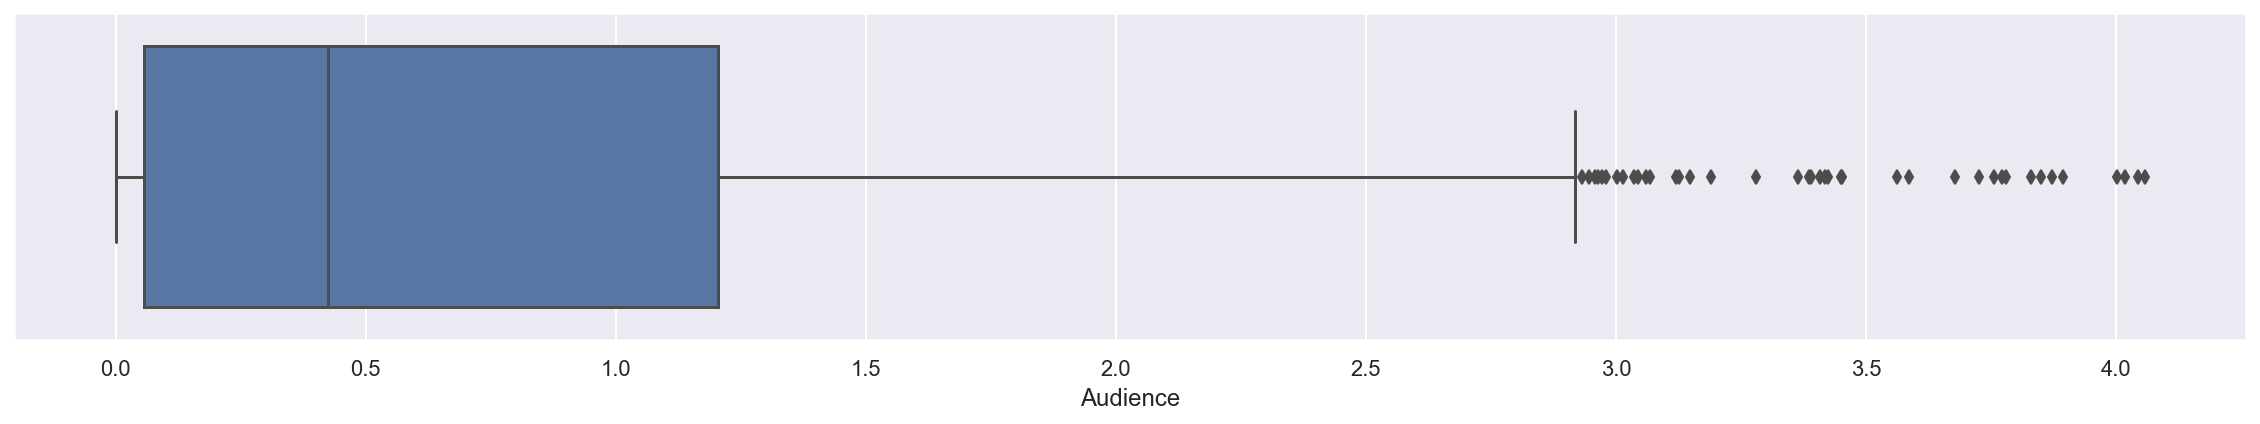

In [21]:
plt.figure(figsize=(20,3)) 
sns.boxplot(x=df_2["Audience"])
plt.show()

In [22]:
X_train.loc[200]

Screen            499
rate_12세이상관람가       0
rate_15세이상관람가       1
rate_18세관람가         0
rate_전체관람가          0
rate_청소년관람불가        0
genre_SF            0
genre_가족            0
genre_공연            0
genre_공포(호러)        0
genre_기타            0
genre_다큐멘터리         0
genre_드라마           1
genre_멜로/로맨스        0
genre_뮤지컬           0
genre_미스터리          0
genre_범죄            0
genre_사극            0
genre_서부극(웨스턴)      0
genre_스릴러           0
genre_애니메이션         0
genre_액션            0
genre_어드벤처          0
genre_전쟁            0
genre_코미디           0
genre_판타지           0
season_1            0
season_2            0
season_3            1
season_4            0
year_2008           1
year_2009           0
year_2010           0
year_2011           0
year_2012           0
year_2013           0
year_2014           0
year_2015           0
year_2016           0
year_2017           0
year_2018           0
year_2019           0
month_1             0
month_2             0
month_3             0
month_4   

In [23]:
X_new = [np.array(X_train.loc[200])]
print(reg.predict(X_new))

[1.56767478]


In [24]:
X_new = [np.array(X_train.loc[500])]
print(reg.predict(X_new))

[-0.04915299]


In [25]:
df.loc[500]

NameError: name 'df' is not defined

In [ ]:
df.loc[200]

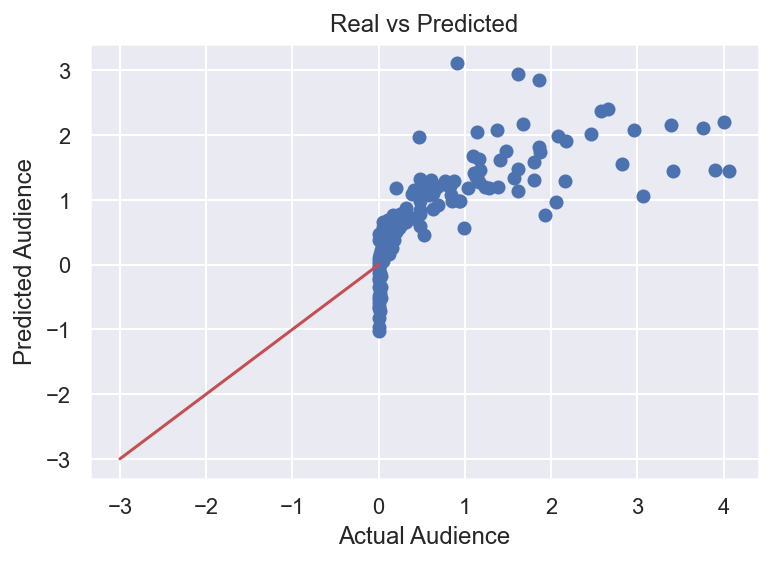

In [26]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([-3,0],[-3,0],'r')
plt.show()